# Composite Plate Mechanics with Python

reference: hyer page 584. 617

The motivation behind this talk is to explore the capability of python as a scientific computation tool as well as solve a typical calcuation that could either be done by hand, or coded. I find coding to be a convient way to learn challenging mathmatics because I can easily replicate my work in the future when I can't remember the details of the calcuation or, if there are any errors, they can typically be easily fixed and the other calcuations re-ran without a lot of duplcation of effort.

Composite mechanics can be very iterative by nature and is easiest to employ linear algebra to find displacements, strains and stresses of composites. Coding solutions is also handy when visualizations are required.

For this example, we are interested in calcuating the stress critical ply in a simple asymteric composite plate with a pressure load applied. We can chooose a variety of boundary conditions of our plate, but this solution is limited to 2 dimensional displacements, x and z. If we are interested in 3 dimensional displacements, the problem becomes much more challenging as partial differentiation of the governing equations gives us a PDE, which is more challenging to solve. 

The steps to solving are 
- Identify governing and equilibrium equations
- import python required libraries 
- declare symbolic variables
- declare numeric variables, including material properties, plate dimensions, and plate pressure
- solve 4th order differntial equation with 7 constants
- apply plate boundary conditions and acquire u(x) and w(x) displacement functions
- acquire strain equations from displacement
- acquire stress equations from strain
- determine critical ply from highest ply stress ratio



In [2]:
# Import Python modules and 
import numpy as np
from sympy import *
from pprint import pprint

# printing and plotting settings 
init_printing(use_latex='mathjax')
get_ipython().magic('matplotlib inline') # inline plotting

x,y,q = symbols('x,y,q')

As mentioned before, if we want to perform a 3 dimensional displacement model of the composite plate, we would have 6 reaction forces that are a function of x and y. Those 6 reaction forces are related by 3 equalibrium equations

In [3]:
# # hyer page 584
# # Equations of equilibrium
# Nxf = Function('N_x')(x,y)
# Nyf = Function('N_y')(x,y)
# Nxyf = Function('N_xy')(x,y)
# Mxf = Function('M_x')(x,y)
# Myf = Function('M_y')(x,y)
# Mxyf = Function('M_xy')(x,y)

# symbols for force and moments
Nx,Ny,Nxy,Mx,My,Mxy = symbols('N_x,N_y,N_xy,M_x,M_y,M_xy')
Nxf,Nyf,Nxyf,Mxf,Myf,Mxyf = symbols('Nxf,Nyf,Nxyf,Mxf,Myf,Mxyf')

In [4]:
Eq(0,diff(Nx(x,y), x)+diff(Nxy(x,y),y))

    ∂              ∂             
0 = ──(Nₓ(x, y)) + ──(N_xy(x, y))
    ∂x             ∂y            

In [5]:
Eq(0,diff(Nxy(x,y), x)+diff(Ny(x,y),y))

    ∂                ∂            
0 = ──(N_xy(x, y)) + ──(N_y(x, y))
    ∂x               ∂y           

In [6]:
Eq(0,  diff(Mx(x,y),x,2) + 2*diff(Mxy(x,y),x,y) + diff(My(x,y) ,y,2)+ q  )

          2                  2                  2           
         ∂                  ∂                  ∂            
0 = q + ───(Mₓ(x, y)) + 2⋅─────(M_xy(x, y)) + ───(M_y(x, y))
          2               ∂y ∂x                 2           
        ∂x                                    ∂y            

What makes composite plates special is the fact that they typically not isotropic. This is handled by the 6x6 ABD matrix that defines the composites properties axially, in bending, and the coupling between the two.

In [28]:
# composite properties 
A11,A22,A66,A12,A16,A26,A66 = symbols('A11,A22,A66,A12,A16,A26,A66')
B11,B22,B66,B12,B16,B26,B66 = symbols('B11,B22,B66,B12,B16,B26,B66')
D11,D22,D66,D12,D16,D26,D66 = symbols('D11,D22,D66,D12,D16,D26,D66')

## constants of integration when solving differential equation
C1,C2,C3,C4,C5,C6 = symbols('C1,C2,C3,C4,C5,C6')

# plate and composite parameters
th,a,b = symbols('th,a,b')

# displacement functions
u0 = Function('u0')(x,y)
v0 = Function('v0')(x,y)
w0 = Function('w0')(x,y)

Let's compute our 6 displacement conditions which is where our PDE's show up

In [29]:
Nxf = A11*diff(u0,x) + A12*diff(v0,y) + A16*(diff(u0,y) + diff(v0,x)) - B11*diff(w0,x,2) - B12*diff(w0,y,2) - 2*B16*diff(w0,x,y)
Eq(Nx, Nxf)

                                                                              
         ∂                  ∂                  ⎛∂              ∂           ⎞  
Nₓ = A₁₁⋅──(u₀(x, y)) + A₁₂⋅──(v₀(x, y)) + A₁₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟ -
         ∂x                 ∂y                 ⎝∂y             ∂x          ⎠  
                                                                              

       2                   2                      2           
      ∂                   ∂                      ∂            
 B₁₁⋅───(w₀(x, y)) - B₁₂⋅───(w₀(x, y)) - 2⋅B₁₆⋅─────(w₀(x, y))
       2                   2                   ∂y ∂x          
     ∂x                  ∂y                                   

In [30]:
Nyf = A12*diff(u0,x) + A22*diff(v0,y) + A26*(diff(u0,y) + diff(v0,x)) - B12*diff(w0,x,2) - B22*diff(w0,y,2) - 2*B26*diff(w0,x,y)
Eq(Ny,Nyf)

                                                                              
          ∂                  ∂                  ⎛∂              ∂           ⎞ 
N_y = A₁₂⋅──(u₀(x, y)) + A₂₂⋅──(v₀(x, y)) + A₂₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟ 
          ∂x                 ∂y                 ⎝∂y             ∂x          ⎠ 
                                                                              

        2                   2                      2           
       ∂                   ∂                      ∂            
- B₁₂⋅───(w₀(x, y)) - B₂₂⋅───(w₀(x, y)) - 2⋅B₂₆⋅─────(w₀(x, y))
        2                   2                   ∂y ∂x          
      ∂x                  ∂y                                   

In [31]:
Nxyf = A16*diff(u0,x) + A26*diff(v0,y) + A66*(diff(u0,y) + diff(v0,x)) - B16*diff(w0,x,2) - B26*diff(w0,y,2) - 2*B66*diff(w0,x,y) 
Eq(Nxy,Nxyf)

                                                                              
           ∂                  ∂                  ⎛∂              ∂           ⎞
N_xy = A₁₆⋅──(u₀(x, y)) + A₂₆⋅──(v₀(x, y)) + A₆₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟
           ∂x                 ∂y                 ⎝∂y             ∂x          ⎠
                                                                              

         2                   2                      2           
        ∂                   ∂                      ∂            
 - B₁₆⋅───(w₀(x, y)) - B₂₆⋅───(w₀(x, y)) - 2⋅B₆₆⋅─────(w₀(x, y))
         2                   2                   ∂y ∂x          
       ∂x                  ∂y                                   

In [32]:
Mxf = B11*diff(u0,x) + B12*diff(v0,y) + B16*(diff(u0,y) + diff(v0,x)) - D11*diff(w0,x,2) - D12*diff(w0,y,2) - 2*D16*diff(w0,x,y)
Eq(Mx,Mxf)

                                                                              
         ∂                  ∂                  ⎛∂              ∂           ⎞  
Mₓ = B₁₁⋅──(u₀(x, y)) + B₁₂⋅──(v₀(x, y)) + B₁₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟ -
         ∂x                 ∂y                 ⎝∂y             ∂x          ⎠  
                                                                              

       2                   2                      2           
      ∂                   ∂                      ∂            
 D₁₁⋅───(w₀(x, y)) - D₁₂⋅───(w₀(x, y)) - 2⋅D₁₆⋅─────(w₀(x, y))
       2                   2                   ∂y ∂x          
     ∂x                  ∂y                                   

In [33]:
Myf = B12*diff(u0,x) + B22*diff(v0,y) + B26*(diff(u0,y) + diff(v0,x)) - D12*diff(w0,x,2) - D22*diff(w0,y,2) - 2*D26*diff(w0,x,y)
Eq(My,Myf)

                                                                              
          ∂                  ∂                  ⎛∂              ∂           ⎞ 
M_y = B₁₂⋅──(u₀(x, y)) + B₂₂⋅──(v₀(x, y)) + B₂₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟ 
          ∂x                 ∂y                 ⎝∂y             ∂x          ⎠ 
                                                                              

        2                   2                      2           
       ∂                   ∂                      ∂            
- D₁₂⋅───(w₀(x, y)) - D₂₂⋅───(w₀(x, y)) - 2⋅D₂₆⋅─────(w₀(x, y))
        2                   2                   ∂y ∂x          
      ∂x                  ∂y                                   

In [34]:
Mxyf = B16*diff(u0,x) + B26*diff(v0,y) + B66*(diff(u0,y) + diff(v0,x)) - D16*diff(w0,x,2) - D26*diff(w0,y,2) - 2*D66*diff(w0,x,y)
Eq(Mxy,Mxyf)

                                                                              
           ∂                  ∂                  ⎛∂              ∂           ⎞
M_xy = B₁₆⋅──(u₀(x, y)) + B₂₆⋅──(v₀(x, y)) + B₆₆⋅⎜──(u₀(x, y)) + ──(v₀(x, y))⎟
           ∂x                 ∂y                 ⎝∂y             ∂x          ⎠
                                                                              

         2                   2                      2           
        ∂                   ∂                      ∂            
 - D₁₆⋅───(w₀(x, y)) - D₂₆⋅───(w₀(x, y)) - 2⋅D₆₆⋅─────(w₀(x, y))
         2                   2                   ∂y ∂x          
       ∂x                  ∂y                                   

Now, combine our 6 displacement conditions with our 3 equalibrium equations to get three goverening equations

In [35]:
eq1 = diff(Nxf,x) + diff(Nxf,y)
eq1

      2                    2                     2                    2       
     ∂                    ∂                     ∂                    ∂        
A₁₁⋅───(u₀(x, y)) + A₁₁⋅─────(u₀(x, y)) + A₁₂⋅─────(v₀(x, y)) + A₁₂⋅───(v₀(x, 
      2                 ∂y ∂x                 ∂y ∂x                   2       
    ∂x                                                              ∂y        

          ⎛   2                2          ⎞       ⎛  2                2       
          ⎜  ∂                ∂           ⎟       ⎜ ∂                ∂        
y)) + A₁₆⋅⎜─────(u₀(x, y)) + ───(v₀(x, y))⎟ + A₁₆⋅⎜───(u₀(x, y)) + ─────(v₀(x,
          ⎜∂y ∂x               2          ⎟       ⎜  2             ∂y ∂x      
          ⎝                  ∂x           ⎠       ⎝∂y                         

    ⎞         3                    3                      3                   
    ⎟        ∂                    ∂                      ∂                    
 y))⎟ - B₁₁⋅───(w₀(x, y)) - B₁₁⋅──────(w₀(x, y)) -

In [36]:
eq2 = diff(Nxyf,x) + diff(Nyf,y)
eq2

       2                    2                   2                 ⎛  2        
      ∂                    ∂                   ∂                  ⎜ ∂         
A₁₂⋅─────(u₀(x, y)) + A₁₆⋅───(u₀(x, y)) + A₂₂⋅───(v₀(x, y)) + A₂₆⋅⎜───(u₀(x, y
    ∂y ∂x                   2                   2                 ⎜  2        
                          ∂x                  ∂y                  ⎝∂y         

        2           ⎞          2                  ⎛   2                2      
       ∂            ⎟         ∂                   ⎜  ∂                ∂       
)) + ─────(v₀(x, y))⎟ + A₂₆⋅─────(v₀(x, y)) + A₆₆⋅⎜─────(u₀(x, y)) + ───(v₀(x,
     ∂y ∂x          ⎟       ∂y ∂x                 ⎜∂y ∂x               2      
                    ⎠                             ⎝                  ∂x       

    ⎞          3                     3                   3                    
    ⎟         ∂                     ∂                   ∂                     
 y))⎟ - B₁₂⋅──────(w₀(x, y)) - B₁₆⋅───(w₀(x, y)) -

In [37]:
eq3 = diff(Mxf,x,2) + 2*diff(Mxyf,x,y) + diff(Myf,y,2) + q
eq3

      3                    3                      3                   ⎛   3   
     ∂                    ∂                      ∂                    ⎜  ∂    
B₁₁⋅───(u₀(x, y)) + B₁₂⋅──────(u₀(x, y)) + B₁₂⋅──────(v₀(x, y)) + B₁₆⋅⎜──────(
      3                   2                         2                 ⎜     2 
    ∂x                  ∂y  ∂x                 ∂y ∂x                  ⎝∂y ∂x  

              3          ⎞            3                     3                 
             ∂           ⎟           ∂                     ∂                  
u₀(x, y)) + ───(v₀(x, y))⎟ + 2⋅B₁₆⋅──────(u₀(x, y)) + B₂₂⋅───(v₀(x, y)) + B₂₆⋅
              3          ⎟              2                   3                 
            ∂x           ⎠         ∂y ∂x                  ∂y                  

⎛  3                3            ⎞            3                     ⎛   3     
⎜ ∂                ∂             ⎟           ∂                      ⎜  ∂      
⎜───(u₀(x, y)) + ──────(v₀(x, y))⎟ + 2⋅B₂₆⋅──────(

Yikes, I do not want to solve that (at least right now). If we make the assumption that the plate has equal displacement of y in the x and y direction, then we can simply things ALOT! These simplifications are valid for cross ply unsymmetric laminates plate, Hyer pg 616. This is applied by setting some of our material properties to zero. $ A16=A26=D16=D26=B16=B26=B12=B66=0 $
Almost like magic, we now have some equations that aren't so scary.

In [38]:
u0 = Function('u0')(x)
v0 = Function('v0')(x)
w0 = Function('w0')(x)

In [39]:
Nxf = A11*diff(u0,x) + A12*diff(v0,y) - B11*diff(w0,x,2)
Eq(Nx, Nxf)

                           2       
         d                d        
Nₓ = A₁₁⋅──(u₀(x)) - B₁₁⋅───(w₀(x))
         dx                2       
                         dx        

In [40]:
Nyf = A12*diff(u0,x) + A22*diff(v0,y) - B22*diff(w0,y,2)
Eq(Ny,Nyf)

          d        
N_y = A₁₂⋅──(u₀(x))
          dx       

In [41]:
Nxyf = A66*(diff(u0,y) + diff(v0,x))
Eq(Nxy,Nxyf)

           d        
N_xy = A₆₆⋅──(v₀(x))
           dx       

In [42]:
Mxf = B11*diff(u0,x) - D11*diff(w0,x,2) - D12*diff(w0,y,2)
Eq(Mx,Mxf)

                           2       
         d                d        
Mₓ = B₁₁⋅──(u₀(x)) - D₁₁⋅───(w₀(x))
         dx                2       
                         dx        

In [43]:
Myf = B22*diff(v0,y) - D12*diff(w0,x,2) - D22*diff(w0,y,2)
Eq(My,Myf)

             2       
            d        
M_y = -D₁₂⋅───(w₀(x))
             2       
           dx        

In [44]:
Mxyf = 0
Eq(Mxy,Mxyf)

M_xy = 0

Now we are getting somewhere. Finally we can solve the differential equations 

In [45]:
dsolve(diff(Nx(x)))

Nₓ(x) = C₁

In [46]:
dsolve(diff(Mx(x),x,2)+q)

                       2
                    q⋅x 
Mₓ(x) = C₁ + C₂⋅x - ────
                     2  

Now solve for u0 and w0 with some pixie dust

In [55]:
eq4 = (Nxf-C1)
eq4

                      2            
    d                d             
A₁₁⋅──(u₀(x)) - B₁₁⋅───(w₀(x)) - C₁
    dx                2            
                    dx             

In [56]:
eq5 = Mxf -( -q*x**2 + C2*x + C3 )
eq5

                                  2              
    d                            d              2
B₁₁⋅──(u₀(x)) - C₂⋅x - C₃ - D₁₁⋅───(w₀(x)) + q⋅x 
    dx                            2              
                                dx               

In [60]:
eq6 = Eq(solve(eq4,diff(u0,x))[0] , solve(eq5, diff(u0,x))[0])
eq6

      2                                 2              
     d                                 d              2
B₁₁⋅───(w₀(x)) + C₁   C₂⋅x + C₃ + D₁₁⋅───(w₀(x)) - q⋅x 
      2                                 2              
    dx                                dx               
─────────────────── = ─────────────────────────────────
        A₁₁                          B₁₁               

In [61]:
w0f = dsolve(eq6, w0)
w0f

                      3                     4                     2           
              A₁₁⋅C₂⋅x               A₁₁⋅q⋅x                     x ⋅(-A₁₁⋅C₃ +
w₀(x) = - ────────────────── + ─────────────────── + C₁ + C₅⋅x + ─────────────
            ⎛             2⎞      ⎛             2⎞                   ⎛        
          6⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠   12⋅⎝A₁₁⋅D₁₁ - B₁₁ ⎠                 2⋅⎝A₁₁⋅D₁₁ 

        
 B₁₁⋅C₄)
────────
     2⎞ 
- B₁₁ ⎠ 

In [64]:
eq7 = Eq(solve(eq6, diff(w0,x,2))[0] , solve(eq4,diff(w0,x,2))[0])
eq7

                                             d             
                            2            A₁₁⋅──(u₀(x)) - C₁
-A₁₁⋅C₂⋅x - A₁₁⋅C₃ + A₁₁⋅q⋅x  + B₁₁⋅C₁       dx            
────────────────────────────────────── = ──────────────────
                         2                      B₁₁        
            A₁₁⋅D₁₁ - B₁₁                                  

In [63]:
u0f = dsolve(eq7)
u0f

                  2                                  3                 3   
          B₁₁⋅C₁⋅x                            B₁₁⋅q⋅x               B₁₁ ⋅C₄
        - ───────── - B₁₁⋅C₃⋅x - B₁₁⋅C₄⋅D₁₁ + ──────── + C₂⋅D₁₁⋅x + ───────
              2                                  3                    A₁₁  
u₀(x) = ───────────────────────────────────────────────────────────────────
                                                2                          
                                   A₁₁⋅D₁₁ - B₁₁                           

## Another example

In [23]:
# declare symbols for equation generation
th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6 = symbols('th,x,y,z,q,a,b,C1,C2,C3,C4,C5,C6')

strainx, strainy, strainxy, stressx, stress, stressxy = symbols('epsilonx,epsilony,gammaxy,sigmax,sigmay,sigmaxy')

ex,ey,exy,sx,sy,sxy = symbols('epsilon_x, epsilon_y, gamma_xy,sigma_x,sigma_y,tau_xy')

A11,A22,A66,A12,A16,A26,A66 = symbols('A11,A22,A66,A12,A16,A26,A66')
B11,B22,B66,B12,B16,B26,B66 = symbols('B11,B22,B66,B12,B16,B26,B66')
D11,D22,D66,D12,D16,D26,D66 = symbols('D11,D22,D66,D12,D16,D26,D66')
Nx,Ny,Nxy,Mx,My,Mxy = symbols('Nx,Ny,Nxy,Mx,My,Mxy')

##if use this, then reference  the function as u0(x), example  diff(u0(x),x,2)
#
#u0 = Function('u0')(x,y)
#v0 = Function('v0')(x,y)
#w0 = Function('w0')(x,y)

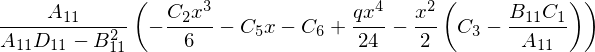

In [27]:
w0 = A11 / (A11*D11-B11**2) * ( q*x**4/24 - C2*x**3/6 - (C3- B11/A11*C1)*x**2/2 - C5*x - C6 )
w0

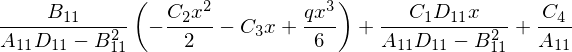

In [28]:
u0 = D11/(A11*D11 - B11**2 ) *C1*x + B11/(A11*D11-B11**2) * (q*x**3/6-C2*x**2/2-C3*x)+C4/A11
u0

In [29]:
Nx = C1
Mx = -q*x**2/2+C2*x+C3

# simple support, pin pin
bc1 = Mx.subs(x,+a/2)
bc2 = Mx.subs(x,-a/2)
bc3 = u0.subs(x,+a/2)
bc4 = u0.subs(x,-a/2)
bc5 = w0.subs(x,+a/2)
bc6 = w0.subs(x,-a/2)

# pin-roller
#bc1 = Mx.subs(x,+a/2)
#bc2 = Mx.subs(x,-a/2)
#bc3 = Nx.subs(x,+a/2)
#bc4 = u0.subs(x,-a/2)
#bc5 = w0.subs(x,+a/2)
#bc6 = w0.subs(x,-a/2)

# fixed-pin
#bc1 = u0.subs(x,+a/2)
#bc2 = w0.subs(x,+a/2)
#bc3 = w0.diff(x).subs(x,+a/2)
#bc4 = u0.subs(x,-a/2)
#bc5 = Mx.subs(x,-a/2)
#bc6 = w0.subs(x,-a/2)

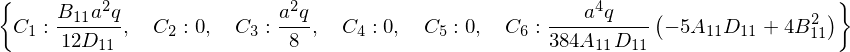

In [30]:
C = solve([bc1,bc2,bc3,bc4,bc5,bc6],[C1,C2,C3,C4,C5,C6])
C

In [31]:
a_ = 2
b_ = 10
q_ = -5
ABD= np.array([[  1.0240e+08,   1.8945e+07,  -1.8626e-09,  -5.4570e-12,  -1.3642e-12,   0.0000e+00],
               [  1.8945e+07,   1.6250e+07,  -9.3132e-10,  -1.3642e-12,  -1.3642e-12,   0.0000e+00],
               [ -1.8626e-09,  -9.3132e-10,   2.0191e+07,   0.0000e+00,   1.1369e-13,  -1.3642e-12],
               [ -5.4570e-12,  -1.3642e-12,   0.0000e+00,   5.7792e+00,   1.7657e+00,   1.2611e+00],
               [ -1.3642e-12,  -1.3642e-12,   0.0000e+00,   1.7657e+00,   1.2561e+00,   4.1768e-01],
               [  0.0000e+00,   1.1369e-13,  -1.3642e-12,   1.2611e+00,   4.1768e-01,   1.8498e+00]])
A = ABD[0:3,0:3]
B = ABD[0:3,3:6]
D = ABD[3:6,3:6]
A11_ = A[0,0]
B11_ = B[0,0]
D11_ = D[0,0]

In [32]:
C1_ = C[C1].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C2_ = C[C2].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C3_ = C[C3].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C4_ = C[C4].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C5_ = C[C5].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})
C6_ = C[C6].subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_})

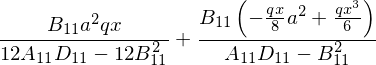

In [39]:
u0 = u0.subs({C1:C[C1] , C2:C[C2], C3:C[C3], C4:C[C4], C5:C[C5], C6:C[C6]})
u0

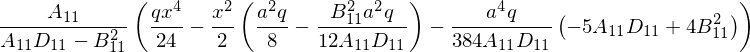

In [37]:
w0 = w0.subs({C1:C[C1] , C2:C[C2], C3:C[C3], C4:C[C4], C5:C[C5], C6:C[C6]})
w0

In [40]:
u0f = u0.subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_,C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_})
u0f

In [41]:
w0f = w0.subs({a:a_,b:b_,q:q_,A11:A11_, B11:B11_, D11:D11_,C1:C1_ , C2:C2_, C3:C3_, C4:C4_, C5:C5_, C6:C6_})
w0f

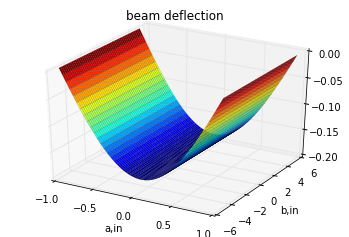

In [42]:
# Sympy 3d plots
from sympy.plotting import plot3d
w0p = w0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_})
u0p = u0f.subs({a:a_, b:b_, q:q_, A11:A11_, B11:B11_, D11:D11_})
plot3d(w0p, (x,-a_/2,a_/2), (y,-b_/2,b_/2), title='beam deflection', xlabel='a,in', ylabel='b,in', zlabel='z,in')

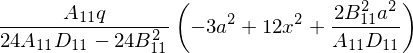

In [49]:
# Strain
eps0x = diff(u0,x)
eps0xy = diff(u0,y)
kap0x = diff(w0,x,2)

kap0x

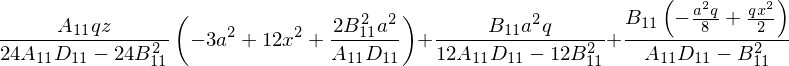

In [51]:
epsx = eps0x+z*kap0x
epsx